In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
try:
    df = pd.read_csv("flu.csv")
except FileNotFoundError:
    print("Error")
    exit()

In [4]:
x = df[['Chills','Running Nose','Headache','Fever']]
y = df['Has Flu']

In [5]:
labelencoder = LabelEncoder()
x = x.apply(labelencoder.fit_transform)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [8]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [10]:
accuracy_test = accuracy_score(y_test,y_test_pred)
accuracy_train = accuracy_score(y_train,y_train_pred)
print("Accuracy Test:",accuracy_test)
print("Accuracy Train:",accuracy_train)

Accuracy Test: 0.3333333333333333
Accuracy Train: 1.0


In [21]:
cr = classification_report(y_test,y_test_pred)
print("Classification report:",cr)

Classification report:               precision    recall  f1-score   support

           N       0.00      0.00      0.00         1
           Y       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



In [12]:
cm = confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[0 1]
 [1 1]]


[Text(0.5, 0.75, 'x[3] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.625, 0.5, '  False')]

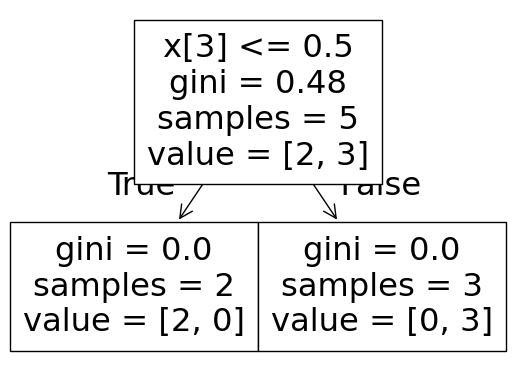

In [38]:
decision_tree = model
plot_tree(decision_tree)

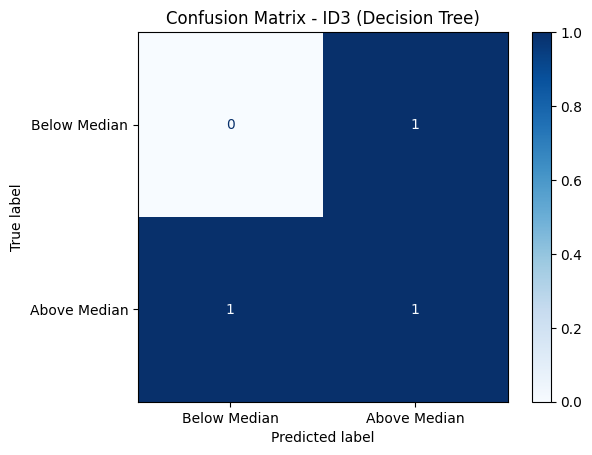

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred),display_labels=['Below Median','Above Median'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - ID3 (Decision Tree)")
plt.show()


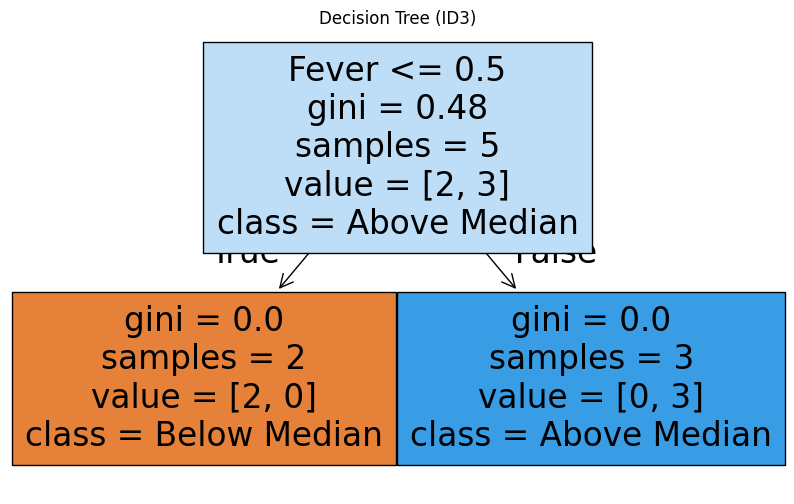

In [56]:
plt.figure(figsize=(10,6))
plot_tree(model, feature_names=['Chills','Running Nose','Headache','Fever'],class_names=['Below Median','Above Median'], filled=True)
plt.title("Decision Tree (ID3)")
plt.show()

[Text(0.5, 0.75, 'Fever <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = N'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Y'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = N'),
 Text(0.625, 0.5, '  False')]

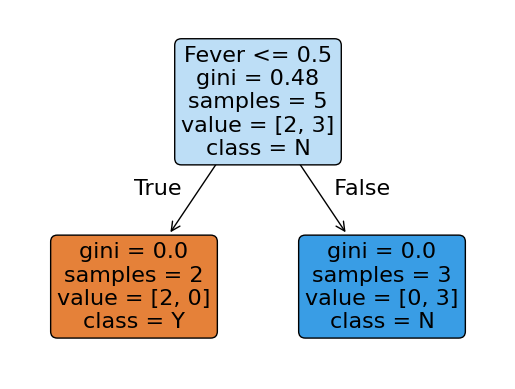

In [69]:
plot_tree(model,feature_names = ['Chills','Running Nose','Headache','Fever'],class_names=['Y','N'],max_depth = 3, fontsize = 16, filled = True, rounded = True)